# Outlines
#### 1. Data cleaning
#### 2. feature engineering
#### 3. Getting more insights
#### 4. Data Pre-processing
      - Splitting  
      - fearure transformation
#### 5. modeling
#### 6. evalution

### Data description
| Attribute          | Description                                                             |
|--------------------|-------------------------------------------------------------------------|
| Name               | The brand and model of the car                                          |
| Location           | The location in which the car is being sold or is available for purchase|
| Year               | The year or edition of the model                                        |
| Kilometers_Driven  | The total kilometers driven in the car by the previous owner(s) in KM   |
| Fuel_Type          | The type of fuel used by the car                                        |
| Transmission       | The type of transmission used by the car                                |
| Owner_Type         | Whether the ownership is Firsthand, Second hand or other                |
| Mileage            | The standard mileage offered by the car company in kmpl or km/kg        |
| Engine             | The displacement volume of the engine in cc                             |
| Power              | The maximum power of the engine in bhp                                  |
| Seats              | The number of seats in the car                                          |
| New_Price          | Price of new model                                                      |
| Price              | The price of the used car in INR Lakhs                                  |


In [ ]:
# Packages for EDA
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.ensemble import IsolationForest


# Showing Plots inside notebook
# %matplotlib inline
# sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2) # Standard figure size for all

In [ ]:
df = pd.read_csv("Data//train.csv")
df.sample(5)

Name    Location  Year  \
4348                            BMW 3 Series 320i Sedan     Kolkata  2011   
3698                             Maruti SX4 ZXI MT BSIV      Mumbai  2012   
1668  Mercedes-Benz E-Class 2015-2017 E250 CDI Avant...      Mumbai  2014   
1374                      Honda Accord 2.4 Elegance A/T     Chennai  2008   
5684                                 Maruti Baleno Zeta  Coimbatore  2018   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
4348               7000    Petrol    Automatic      First  12.05 kmpl   
3698              51800    Petrol       Manual      First   15.5 kmpl   
1668              52000    Diesel    Automatic      First   13.0 kmpl   
1374              90000    Petrol    Automatic      First   10.2 kmpl   
5684              33150    Petrol       Manual      First   21.4 kmpl   

       Engine      Power  Seats  New_Price  Price  
4348  1995 CC    154 bhp    5.0        NaN   9.75  
3698  1586 CC  103.3 bhp    5.0        NaN   3.90  
1668  2143 CC    204 bhp    5.0        NaN  24.50  
1374  2354 CC    180 bhp    5.0        NaN   6.50  
5684  1197 CC   83.1 bhp    5.0  8.71 Lakh   7.39

In [ ]:
df.sample(5)

NameError: name 'df' is not defined

# 1. Data cleaning


### 1.1 Investegation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [ ]:
df.describe()

Year  Kilometers_Driven        Seats        Price
count  6019.000000       6.019000e+03  5977.000000  6019.000000
mean   2013.358199       5.873838e+04     5.278735     9.479468
std       3.269742       9.126884e+04     0.808840    11.187917
min    1998.000000       1.710000e+02     0.000000     0.440000
25%    2011.000000       3.400000e+04     5.000000     3.500000
50%    2014.000000       5.300000e+04     5.000000     5.640000
75%    2016.000000       7.300000e+04     5.000000     9.950000
max    2019.000000       6.500000e+06    10.000000   160.000000

In [ ]:
df.duplicated().sum()

0

#### Notes
- Numerical values mixed with text in (Mileage, Engine, Power) columns.
    - in Milage column we have 2 units (kmpl & km/kg)
- Most of New_Price Column is null values (so, we have 2 solution.)
    - remove it or scrap some data to fill it.
- Null values values in other columns
- Seats columns have some values with Zero !!
- duplicated rows founded
- Power column have values "null bhp"

###  1.2 Working with data issues

> Dropping duplicated columns

In [ ]:
# Remove duplicated row
df.drop_duplicates(inplace=True)

In [ ]:
df.drop("New_Price", axis=1, inplace=True)

> Drop "New_Price" column because most of them is null


> Why did I choose to remove Null values and not to replace it ?
- That's simply because this columns need to be fixed and we cannot calculate any value before we fix it.
- another solution is to make a place holder and replace it after fixing data, (Your desicion id depende on the time)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df[df['Power'] == 'null bhp']

Name   Location  Year  \
76                Ford Fiesta 1.4 SXi TDCi     Jaipur  2008   
79                  Hyundai Santro Xing XL  Hyderabad  2005   
89                  Hyundai Santro Xing XO  Hyderabad  2007   
120   Hyundai Santro Xing XL eRLX Euro III     Mumbai  2005   
143    Hyundai Santro Xing XO eRLX Euro II      Kochi  2008   
...                                    ...        ...   ...   
5861                Hyundai Santro Xing XO    Chennai  2007   
5873   Hyundai Santro Xing XO eRLX Euro II       Pune  2006   
5925           Skoda Laura Classic 1.8 TSI       Pune  2010   
5943               Mahindra Jeep MM 540 DP    Chennai  2002   
5985                       Toyota Etios GD      Delhi  2013   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
76               111111    Diesel       Manual      First   17.8 kmpl   
79                87591    Petrol       Manual      First    0.0 kmpl   
89                73745    Petrol       Manual      First   17.0 kmpl   
120              102000    Petrol       Manual     Second   17.0 kmpl   
143               80759    Petrol       Manual      Third   17.0 kmpl   
...                 ...       ...          ...        ...         ...   
5861              79000    Petrol       Manual      First   17.0 kmpl   
5873              47200    Petrol       Manual     Second   17.0 kmpl   
5925              85000    Petrol       Manual      First   17.5 kmpl   
5943              75000    Diesel       Manual      First    0.0 kmpl   
5985              70000    Diesel       Manual      First  23.59 kmpl   

       Engine     Power  Seats  Price  
76    1399 CC  null bhp    5.0   2.00  
79    1086 CC  null bhp    5.0   1.30  
89    1086 CC  null bhp    5.0   2.10  
120   1086 CC  null bhp    5.0   0.85  
143   1086 CC  null bhp    5.0   1.67  
...       ...       ...    ...    ...  
5861  1086 CC  null bhp    5.0   1.85  
5873  1086 CC  null bhp    5.0   1.20  
5925  1798 CC  null bhp    5.0   2.85  
5943  2112 CC  null bhp    6.0   1.70  
5985  1364 CC  null bhp    5.0   3.88  

[103 rows x 12 columns]

In [ ]:
indx = df[df['Power'] == 'null bhp'].index

In [ ]:
df.drop(indx,axis=0,inplace=True)

- (KMPL) is refered to Kilometers Per Litre
- (km/kg) is refered to kilometers Per kilogram
> 1 liter  = 1 kilogram
- Reference : https://en.wikipedia.org/wiki/Litre

In [ ]:
dirty_cols = ['Mileage', 'Engine', 'Power']

In [ ]:
"17.0kmpl"  "df17.0kmpl"
"17.0kmpl".find('k') >> index

In [ ]:
for col in dirty_cols:
    df[col] = df[col].apply(lambda x : float(x.split()[0]))

#### values health checking

In [ ]:
df.sample(5)

Name    Location  Year  \
3229                       Mahindra XUV500 W8 4WD  Coimbatore  2015   
4308                            Maruti Ertiga VDI  Coimbatore  2014   
2126  Toyota Innova 2.5 G (Diesel) 8 Seater BS IV        Pune  2007   
4652             Volkswagen Vento 1.6 Comfortline       Kochi  2012   
4944                       Maruti Swift Dzire VDI        Pune  2014   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
3229              42999    Diesel       Manual      First    15.10  2179.0   
4308              53817    Diesel       Manual      First    25.47  1248.0   
2126             170428    Diesel       Manual     Second    12.80  2494.0   
4652              60818    Petrol       Manual      First    16.09  1598.0   
4944             197000    Diesel       Manual      First    23.40  1248.0   

      Power  Seats  Price  
3229  140.0    7.0  11.52  
4308   88.5    7.0   7.56  
2126  102.0    8.0   5.70  
4652  103.5    5.0   3.59  
4944   74.0    5.0   5.00

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5872 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   float64
 8   Engine             5872 non-null   float64
 9   Power              5872 non-null   float64
 10  Seats              5872 non-null   float64
 11  Price              5872 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 596.4+ KB


___________________________________

# 2. Feature Engineering

In [ ]:
# Check Name column uniques
df["Name"].nunique()

1811

In [ ]:
print("Percentage of uniques",round(df["Name"].nunique()/df.shape[0]*100),"%")

Percentage of uniques 31 %


>  "Name" feature has no affect that's because it has so many unique values
- So let's make it useful and impactful

In [ ]:
df["Name"]

0                 Maruti Wagon R LXI CNG
1       Hyundai Creta 1.6 CRDi SX Option
2                           Honda Jazz V
3                      Maruti Ertiga VDI
4        Audi A4 New 2.0 TDI Multitronic
                      ...               
6014                    Maruti Swift VDI
6015            Hyundai Xcent 1.1 CRDi S
6016               Mahindra Xylo D4 BSIV
6017                  Maruti Wagon R VXI
6018               Chevrolet Beat Diesel
Name: Name, Length: 5872, dtype: object

> We can notice that the first word of the name is (Brand), so let's get it

In [ ]:
df["Brand"] = df["Name"].apply(lambda x : x.split()[0])

In [ ]:
df["Brand"].nunique()

30

- A huge difference here, From this columns we can make a big affect.

> Another observation that first two word can express wich car we want.
- So, let's change name column with just first 2 words.

In [ ]:
df["Name"] = df["Name"].apply(lambda x : " ".join(x.split()[:2]))

In [ ]:
df["Name"].nunique()

207

- That's great, Now we can make an affect with name column.

In [ ]:
df = df.convert_dtypes()

________________________

In [ ]:
df.sample(5)

Name Location  Year  Kilometers_Driven Fuel_Type  \
3799  Mercedes-Benz E-Class    Delhi  2014              30000    Diesel   
5714            Hyundai i10   Mumbai  2010              57000    Petrol   
956             Hyundai i20    Delhi  2012              71000    Diesel   
5653          Hyundai Creta   Mumbai  2016              29000    Diesel   
5942         Ford Endeavour   Jaipur  2011             119000    Diesel   

     Transmission Owner_Type  Mileage  Engine  Power  Seats  Price  \
3799    Automatic      First    14.21    2143  203.0      5   26.0   
5714    Automatic     Second    16.95    1197   78.9      5    2.5   
956        Manual      First     23.0    1396   90.0      5    3.7   
5653       Manual      First    19.67    1582  126.2      5   12.6   
5942       Manual      Third     13.1    2499  141.0      7    6.5   

              Brand  
3799  Mercedes-Benz  
5714        Hyundai  
956         Hyundai  
5653        Hyundai  
5942           Ford

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5872 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   string 
 1   Location           5872 non-null   string 
 2   Year               5872 non-null   Int64  
 3   Kilometers_Driven  5872 non-null   Int64  
 4   Fuel_Type          5872 non-null   string 
 5   Transmission       5872 non-null   string 
 6   Owner_Type         5872 non-null   string 
 7   Mileage            5872 non-null   Float64
 8   Engine             5872 non-null   Int64  
 9   Power              5872 non-null   Float64
 10  Seats              5872 non-null   Int64  
 11  Price              5872 non-null   Float64
 12  Brand              5872 non-null   string 
dtypes: Float64(3), Int64(4), string(6)
memory usage: 682.4 KB


In [ ]:
df.describe()

Year  Kilometers_Driven    Mileage       Engine       Power  \
count       5872.0             5872.0     5872.0       5872.0      5872.0   
mean   2013.477691       58316.999149  18.277839  1625.745572  113.276894   
std       3.164568       92169.410006   4.365657   601.641783   53.881892   
min         1998.0              171.0        0.0        624.0        34.2   
25%         2012.0            33422.5      15.26       1198.0        75.0   
50%         2014.0            52609.0       18.2       1495.5        97.7   
75%         2016.0           72402.75       21.1       1991.0       138.1   
max         2019.0          6500000.0      33.54       5998.0       560.0   

          Seats      Price  
count    5872.0     5872.0  
mean   5.283719   9.603919  
std    0.805081  11.249453  
min         2.0       0.44  
25%         5.0     3.5175  
50%         5.0       5.75  
75%         5.0       10.0  
max        10.0      160.0

________________________

# 3. Data understanding

### 3.1 Univariate analysis

In [ ]:
px.histogram(df['Kilometers_Driven'])

NameError: name 'px' is not defined

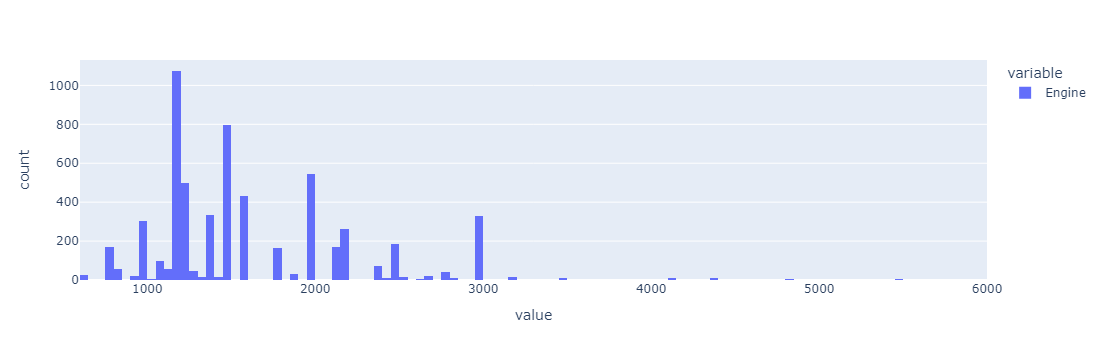

In [ ]:
px.histogram(df['Engine'])

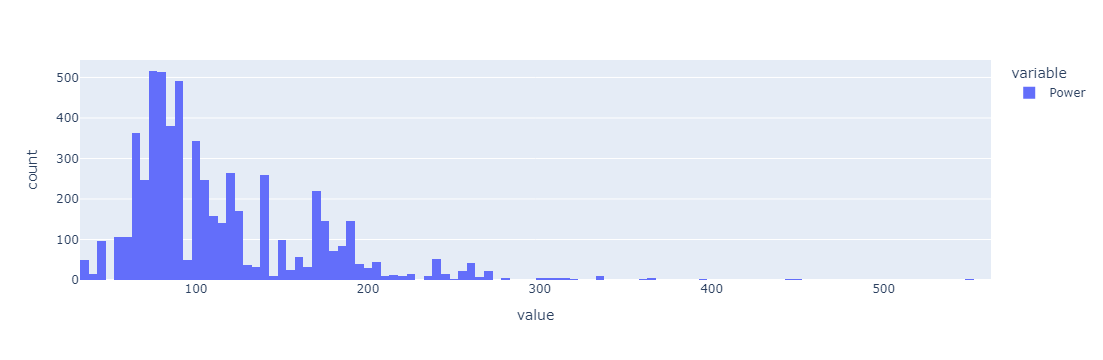

In [ ]:
px.histogram(df['Power'])

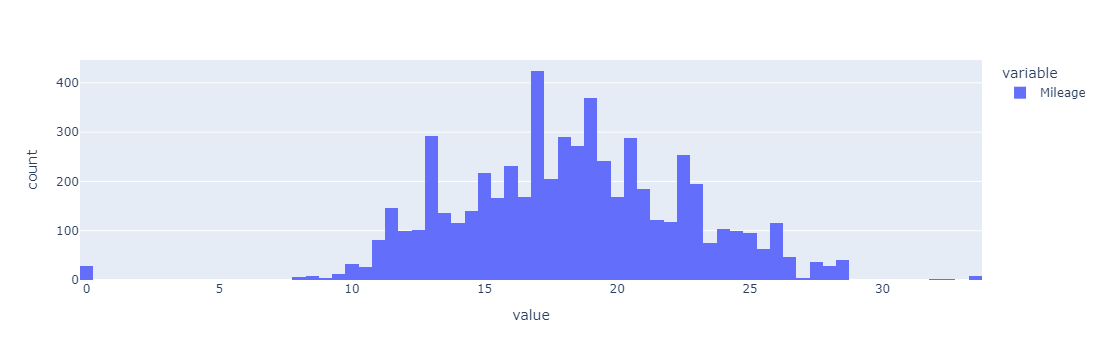

In [ ]:
px.histogram(df['Mileage'])

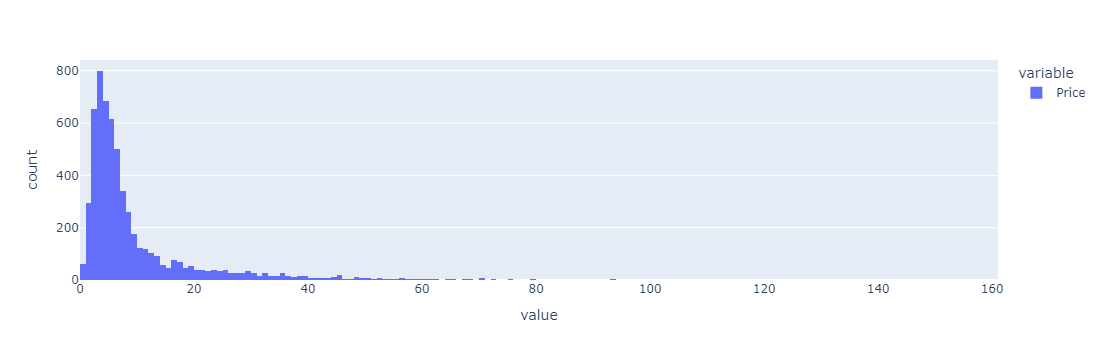

In [ ]:
px.histogram(df['Price'])

# Remove Outliers to check data distribution

In [ ]:
df_visual = df.copy()

In [ ]:
df_visual

Name    Location  Year  Kilometers_Driven Fuel_Type  \
0       Maruti Wagon      Mumbai  2010              72000       CNG   
1      Hyundai Creta        Pune  2015              41000    Diesel   
2         Honda Jazz     Chennai  2011              46000    Petrol   
3      Maruti Ertiga     Chennai  2012              87000    Diesel   
4            Audi A4  Coimbatore  2013              40670    Diesel   
...              ...         ...   ...                ...       ...   
6014    Maruti Swift       Delhi  2014              27365    Diesel   
6015   Hyundai Xcent      Jaipur  2015             100000    Diesel   
6016   Mahindra Xylo      Jaipur  2012              55000    Diesel   
6017    Maruti Wagon     Kolkata  2013              46000    Petrol   
6018  Chevrolet Beat   Hyderabad  2011              47000    Diesel   

     Transmission Owner_Type  Mileage  Engine  Power  Seats  Price      Brand  
0          Manual      First     26.6     998  58.16      5   1.75     Maruti  
1          Manual      First    19.67    1582  126.2      5   12.5    Hyundai  
2          Manual      First     18.2    1199   88.7      5    4.5      Honda  
3          Manual      First    20.77    1248  88.76      7    6.0     Maruti  
4       Automatic     Second     15.2    1968  140.8      5  17.74       Audi  
...           ...        ...      ...     ...    ...    ...    ...        ...  
6014       Manual      First     28.4    1248   74.0      5   4.75     Maruti  
6015       Manual      First     24.4    1120   71.0      5    4.0    Hyundai  
6016       Manual     Second     14.0    2498  112.0      8    2.9   Mahindra  
6017       Manual      First     18.9     998   67.1      5   2.65     Maruti  
6018       Manual      First    25.44     936   57.6      5    2.5  Chevrolet  

[5872 rows x 13 columns]

In [ ]:
# df_target =

In [ ]:
numerical_cols = ['Kilometers_Driven' , 'Mileage' , 'Engine' , 'Power','Price']

In [ ]:
numerical_cols

['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price']

In [ ]:
# df = df[numerical_cols]

In [ ]:
# Initialize Isolation Forest
clf = IsolationForest(contamination=0.1, random_state=42)

# Fit the model and predict outliers
outliers = clf.fit_predict(df[numerical_cols])

# Create a mask for the outliers
outlier_mask = outliers == -1
#This line creates a boolean mask where `True` indicates the presence of an outlier
#(value of -1 in the `outliers` array) and `False` indicates a non-outlier.
# Extract the outliers DataFrame
df_inliers = df[~outlier_mask]  #containing the rows where the `outlier_mask` is False
df_outliers = df[outlier_mask] #containing the rows where the `outlier_mask` is True.

In [ ]:
df_outliers

Name    Location  Year  Kilometers_Driven Fuel_Type  \
14               Land Rover        Pune  2012              85000    Diesel   
29            Toyota Innova      Mumbai  2007             262000    Diesel   
38    Mercedes-Benz M-Class        Pune  2013              85000    Diesel   
41                Tata Nano       Kochi  2014              19698    Petrol   
64              Tata Indica     Chennai  2016             178000    Diesel   
...                     ...         ...   ...                ...       ...   
5957             Honda City  Coimbatore  2004             186679    Petrol   
5972         Hyundai Santro      Mumbai  2008              65000    Petrol   
6006  Mercedes-Benz M-Class      Mumbai  2009             102002    Diesel   
6008       Porsche Panamera   Hyderabad  2013              40000    Diesel   
6011           Skoda Superb   Hyderabad  2009              53000    Petrol   

     Transmission      Owner_Type  Mileage  Engine   Power  Seats  Price  \
14      Automatic          Second      0.0    2179   115.0      5   17.5   
29         Manual  Fourth & Above     12.8    2494   102.0      7    4.0   
38      Automatic           First    11.74    2987   254.8      5   28.0   
41         Manual           First     25.4     624    37.5      4   1.53   
64         Manual           First     25.0    1396    69.0      5    2.5   
...           ...             ...      ...     ...     ...    ...    ...   
5957       Manual          Second     13.0    1493   100.0      5   1.76   
5972       Manual          Second      0.0    1086    62.0      5   1.39   
6006    Automatic           First      8.7    2987  224.34      5  10.75   
6008    Automatic          Second    17.85    2967   300.0      4   45.0   
6011    Automatic           First      0.0    3597   262.6      5   4.75   

              Brand  
14             Land  
29           Toyota  
38    Mercedes-Benz  
41             Tata  
64             Tata  
...             ...  
5957          Honda  
5972        Hyundai  
6006  Mercedes-Benz  
6008        Porsche  
6011          Skoda  

[588 rows x 13 columns]

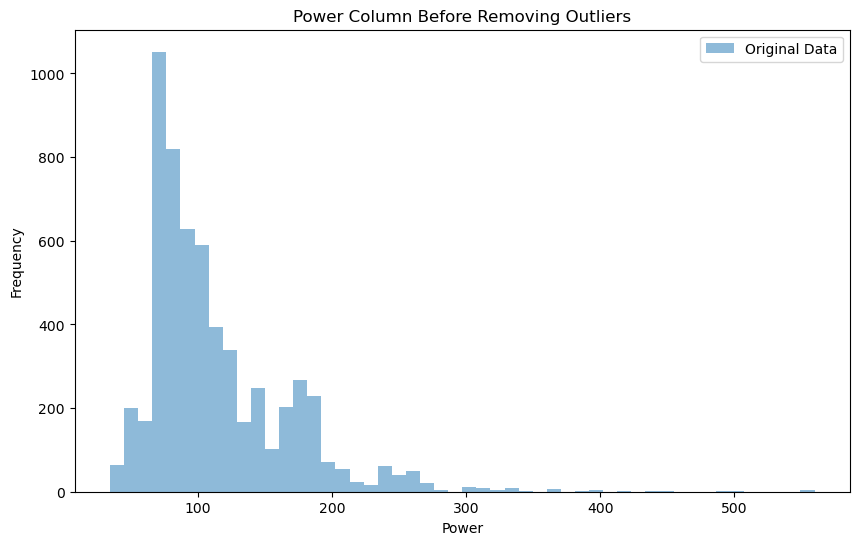

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
plt.figure(figsize=(10, 6))
plt.hist(df['Power'], bins=50, alpha=0.5, label='Original Data')
plt.xlabel('Power')
plt.ylabel('Frequency')
plt.title('Power Column Before Removing Outliers')
plt.legend()
plt.show()

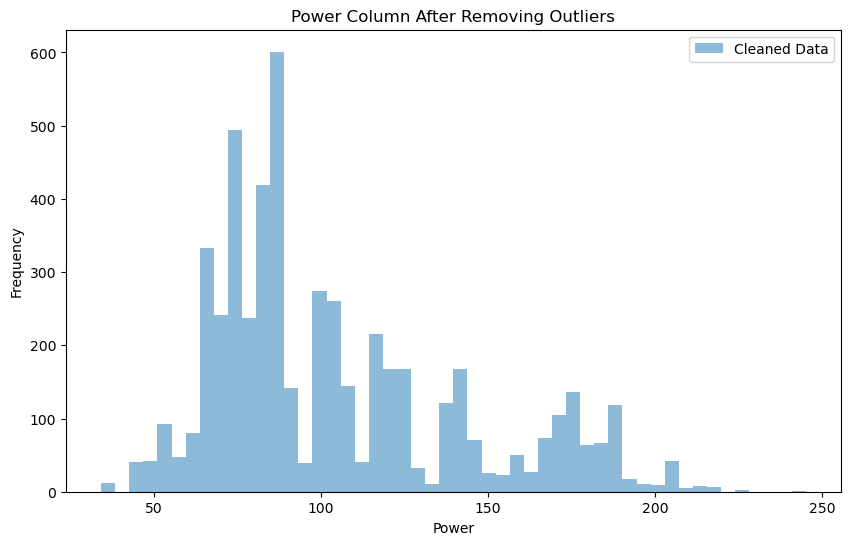

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_inliers['Power'], bins=50, alpha=0.5, label='Cleaned Data')
plt.xlabel('Power')
plt.ylabel('Frequency')
plt.title('Power Column After Removing Outliers')
plt.legend()
plt.show()


### 3.2 Univariate analysis

- year
- kilometers
- transmission
- brand

## Data summery :
    - Numerical columns follow the gussian distribution, but have Outliers
    (My desicion is not to remove it,because it will ne useful)
    - The countrt with the most sales spread is `Mumbai` and the least is `Ahmedabad`
    - Most of cars is form 2010 and 2015

In [ ]:
df.sample()

Name   Location  Year  Kilometers_Driven Fuel_Type Transmission  \
970  Maruti Ritz  Hyderabad  2012              96000    Diesel       Manual   

    Owner_Type  Mileage  Engine  Power  Seats  Price   Brand  
970      First     21.1    1248   73.9      5    3.6  Maruti

________________________

# 4. Data pre-processing

### 4.1 Data splitting

In [ ]:
# define dataset
X, y = df.drop("Price",axis=1) , df["Price"]

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
X_train

Name    Location  Year  Kilometers_Driven Fuel_Type  \
5975      Hyundai i20  Coimbatore  2017              14618    Petrol   
4117          Audi Q5   Bangalore  2015              63000    Diesel   
1727   Chevrolet Aveo        Pune  2007              59000    Petrol   
4310       Tata Manza      Jaipur  2011              86500    Diesel   
2483    Toyota Innova       Delhi  2011              72000    Diesel   
...               ...         ...   ...                ...       ...   
935    Renault Duster      Jaipur  2015              91000    Diesel   
5325     Maruti Swift       Kochi  2016              65210    Diesel   
4088    Skoda Octavia   Hyderabad  2015             122086    Diesel   
244     Toyota Innova      Mumbai  2014             118000    Diesel   
5290  Volkswagen Polo   Hyderabad  2016              29647    Diesel   

     Transmission Owner_Type  Mileage  Engine  Power  Seats       Brand  
5975       Manual      First     18.6    1197  81.83      5     Hyundai  
4117    Automatic      First    14.16    1968  174.3      5        Audi  
1727       Manual      Third    15.26    1150   74.9      5   Chevrolet  
4310       Manual     Second    21.12    1248   88.8      5        Tata  
2483       Manual      First     12.8    2494  102.0      7      Toyota  
...           ...        ...      ...     ...    ...    ...         ...  
935        Manual      First    19.87    1461   83.8      5     Renault  
5325       Manual      First     22.9    1248   74.0      5      Maruti  
4088    Automatic      First     19.3    1968  141.0      5       Skoda  
244        Manual      First     12.8    2494  102.0      7      Toyota  
5290       Manual      First    20.14    1498   88.0      5  Volkswagen  

[4404 rows x 12 columns]

In [ ]:
X_test

Name    Location  Year  Kilometers_Driven Fuel_Type  \
5495          Hyundai Creta      Mumbai  2015              26000    Diesel   
2228          Maruti Ertiga      Mumbai  2016              65263       CNG   
2150        Mahindra XUV500  Coimbatore  2016              67472    Diesel   
664           Hyundai Verna      Jaipur  2008             170000    Diesel   
570              Honda City     Kolkata  2011              42086    Petrol   
...                     ...         ...   ...                ...       ...   
1799  Mercedes-Benz E-Class   Bangalore  2013              29000    Diesel   
4154           Maruti Swift   Bangalore  2012              62000    Diesel   
725              Skoda Yeti      Jaipur  2016              84000    Diesel   
850           Toyota Innova        Pune  2017              43200    Diesel   
3262           Maruti Swift      Jaipur  2014              75074    Diesel   

     Transmission Owner_Type  Mileage  Engine  Power  Seats          Brand  
5495    Automatic      First    17.01    1582  126.2      5        Hyundai  
2228       Manual      First     17.5    1373  80.46      7         Maruti  
2150       Manual      First     16.0    2179  140.0      7       Mahindra  
664        Manual     Second     16.8    1493  110.0      5        Hyundai  
570        Manual      First     17.0    1497  118.0      5          Honda  
...           ...        ...      ...     ...    ...    ...            ...  
1799    Automatic      First    14.21    2143  203.0      5  Mercedes-Benz  
4154       Manual      First     17.8    1248   75.0      5         Maruti  
725        Manual      First    17.72    1968  108.5      5          Skoda  
850        Manual      First    13.68    2393  147.8      7         Toyota  
3262       Manual      First     23.4    1248   74.0      5         Maruti  

[1468 rows x 12 columns]

> Why I have started with splliting data  ?
- That's to avoid data leakage problem.

### 4.2 Data transformation

#### 4.2.1 Numerical transformation

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
Numerical_data = ['Year','Kilometers_Driven','Mileage','Engine','Power','Seats']

In [ ]:
# define the scaler
scaler = RobustScaler() #used IQR insted var & std for outliers
# fit on the training dataset
scaler.fit(X_train[Numerical_data])
# scale the training dataset
X_train[Numerical_data] = scaler.transform(X_train[Numerical_data])
# scale the test dataset
X_test[Numerical_data] = scaler.transform(X_test[Numerical_data])

In [ ]:
X_train

Name    Location  Year  Kilometers_Driven Fuel_Type  \
5975      Hyundai i20  Coimbatore  0.75          -0.982777    Petrol   
4117          Audi Q5   Bangalore  0.25           0.274062    Diesel   
1727   Chevrolet Aveo        Pune -1.75           0.170152    Petrol   
4310       Tata Manza      Jaipur -0.75           0.884530    Diesel   
2483    Toyota Innova       Delhi -0.75           0.507858    Diesel   
...               ...         ...   ...                ...       ...   
935    Renault Duster      Jaipur  0.25           1.001429    Diesel   
5325     Maruti Swift       Kochi  0.50           0.331472    Diesel   
4088    Skoda Octavia   Hyderabad  0.25           1.808962    Diesel   
244     Toyota Innova      Mumbai  0.00           1.702819    Diesel   
5290  Volkswagen Polo   Hyderabad  0.50          -0.592363    Diesel   

     Transmission Owner_Type   Mileage    Engine     Power  Seats       Brand  
5975       Manual      First  0.068847 -0.373266 -0.192868    0.0     Hyundai  
4117    Automatic      First -0.695353  0.598991  1.272583    0.0        Audi  
1727       Manual      Third -0.506024 -0.432535 -0.302694    0.0   Chevrolet  
4310       Manual     Second  0.502582 -0.308953 -0.082409    0.0        Tata  
2483       Manual      First -0.929432  1.262295  0.126783    2.0      Toyota  
...           ...        ...       ...       ...       ...    ...         ...  
935        Manual      First  0.287435 -0.040353 -0.161648    0.0     Renault  
5325       Manual      First  0.808950 -0.308953 -0.316957    0.0      Maruti  
4088    Automatic      First  0.189329  0.598991  0.744849    0.0       Skoda  
244        Manual      First -0.929432  1.262295  0.126783    2.0      Toyota  
5290       Manual      First  0.333907  0.006305 -0.095087    0.0  Volkswagen  

[4404 rows x 12 columns]

In [ ]:
X_test

Name    Location  Year  Kilometers_Driven Fuel_Type  \
5495          Hyundai Creta      Mumbai  0.25          -0.687102    Diesel   
2228          Maruti Ertiga      Mumbai  0.50           0.332848       CNG   
2150        Mahindra XUV500  Coimbatore  0.50           0.390232    Diesel   
664           Hyundai Verna      Jaipur -1.50           3.053643    Diesel   
570              Honda City     Kolkata -0.75          -0.269230    Petrol   
...                     ...         ...   ...                ...       ...   
1799  Mercedes-Benz E-Class   Bangalore -0.25          -0.609170    Diesel   
4154           Maruti Swift   Bangalore -0.50           0.248084    Diesel   
725              Skoda Yeti      Jaipur  0.50           0.819587    Diesel   
850           Toyota Innova        Pune  0.75          -0.240291    Diesel   
3262           Maruti Swift      Jaipur  0.00           0.587713    Diesel   

     Transmission Owner_Type   Mileage    Engine     Power  Seats  \
5495    Automatic      First -0.204819  0.112232  0.510301    0.0   
2228       Manual      First -0.120482 -0.151324 -0.214580    2.0   
2150       Manual      First -0.378657  0.865069  0.729002    2.0   
664        Manual     Second -0.240964  0.000000  0.253566    0.0   
570        Manual      First -0.206540  0.005044  0.380349    0.0   
...           ...        ...       ...       ...       ...    ...   
1799    Automatic      First -0.686747  0.819672  1.727417    0.0   
4154       Manual      First -0.068847 -0.308953 -0.301109    0.0   
725        Manual      First -0.082616  0.598991  0.229794    0.0   
850        Manual      First -0.777969  1.134931  0.852615    2.0   
3262       Manual      First  0.895009 -0.308953 -0.316957    0.0   

              Brand  
5495        Hyundai  
2228         Maruti  
2150       Mahindra  
664         Hyundai  
570           Honda  
...             ...  
1799  Mercedes-Benz  
4154         Maruti  
725           Skoda  
850          Toyota  
3262         Maruti  

[1468 rows x 12 columns]

#### 4.2.1 Catogerical transformation

In [ ]:
Nominal_data = ['Name','Location','Fuel_Type','Transmission','Power','Brand']
ordinal_data = ['Owner_Type']

##### 4.2.1.1 ordinal transformation

> The best case of owner type is (First), Of course the worst is Fourth & Above

In [ ]:
df['Owner_Type'].unique()

<StringArray>
['First', 'Second', 'Fourth & Above', 'Third']
Length: 4, dtype: string

In [ ]:
transformation = {
    "First":3,
    "Second":2,
    "Third":1,
    "Fourth & Above":0
}

In [ ]:
X_train['Owner_Type'] = X_train['Owner_Type'].map(transformation)

In [ ]:
X_test['Owner_Type'] = X_test['Owner_Type'].map(transformation)

In [ ]:
X_train

Name    Location  Year  Kilometers_Driven Fuel_Type  \
5975      Hyundai i20  Coimbatore  0.75          -0.982777    Petrol   
4117          Audi Q5   Bangalore  0.25           0.274062    Diesel   
1727   Chevrolet Aveo        Pune -1.75           0.170152    Petrol   
4310       Tata Manza      Jaipur -0.75           0.884530    Diesel   
2483    Toyota Innova       Delhi -0.75           0.507858    Diesel   
...               ...         ...   ...                ...       ...   
935    Renault Duster      Jaipur  0.25           1.001429    Diesel   
5325     Maruti Swift       Kochi  0.50           0.331472    Diesel   
4088    Skoda Octavia   Hyderabad  0.25           1.808962    Diesel   
244     Toyota Innova      Mumbai  0.00           1.702819    Diesel   
5290  Volkswagen Polo   Hyderabad  0.50          -0.592363    Diesel   

     Transmission  Owner_Type   Mileage    Engine     Power  Seats       Brand  
5975       Manual           3  0.068847 -0.373266 -0.192868    0.0     Hyundai  
4117    Automatic           3 -0.695353  0.598991  1.272583    0.0        Audi  
1727       Manual           1 -0.506024 -0.432535 -0.302694    0.0   Chevrolet  
4310       Manual           2  0.502582 -0.308953 -0.082409    0.0        Tata  
2483       Manual           3 -0.929432  1.262295  0.126783    2.0      Toyota  
...           ...         ...       ...       ...       ...    ...         ...  
935        Manual           3  0.287435 -0.040353 -0.161648    0.0     Renault  
5325       Manual           3  0.808950 -0.308953 -0.316957    0.0      Maruti  
4088    Automatic           3  0.189329  0.598991  0.744849    0.0       Skoda  
244        Manual           3 -0.929432  1.262295  0.126783    2.0      Toyota  
5290       Manual           3  0.333907  0.006305 -0.095087    0.0  Volkswagen  

[4404 rows x 12 columns]

In [ ]:
X_test

Name    Location  Year  Kilometers_Driven Fuel_Type  \
5495          Hyundai Creta      Mumbai  0.25          -0.687102    Diesel   
2228          Maruti Ertiga      Mumbai  0.50           0.332848       CNG   
2150        Mahindra XUV500  Coimbatore  0.50           0.390232    Diesel   
664           Hyundai Verna      Jaipur -1.50           3.053643    Diesel   
570              Honda City     Kolkata -0.75          -0.269230    Petrol   
...                     ...         ...   ...                ...       ...   
1799  Mercedes-Benz E-Class   Bangalore -0.25          -0.609170    Diesel   
4154           Maruti Swift   Bangalore -0.50           0.248084    Diesel   
725              Skoda Yeti      Jaipur  0.50           0.819587    Diesel   
850           Toyota Innova        Pune  0.75          -0.240291    Diesel   
3262           Maruti Swift      Jaipur  0.00           0.587713    Diesel   

     Transmission  Owner_Type   Mileage    Engine     Power  Seats  \
5495    Automatic           3 -0.204819  0.112232  0.510301    0.0   
2228       Manual           3 -0.120482 -0.151324 -0.214580    2.0   
2150       Manual           3 -0.378657  0.865069  0.729002    2.0   
664        Manual           2 -0.240964  0.000000  0.253566    0.0   
570        Manual           3 -0.206540  0.005044  0.380349    0.0   
...           ...         ...       ...       ...       ...    ...   
1799    Automatic           3 -0.686747  0.819672  1.727417    0.0   
4154       Manual           3 -0.068847 -0.308953 -0.301109    0.0   
725        Manual           3 -0.082616  0.598991  0.229794    0.0   
850        Manual           3 -0.777969  1.134931  0.852615    2.0   
3262       Manual           3  0.895009 -0.308953 -0.316957    0.0   

              Brand  
5495        Hyundai  
2228         Maruti  
2150       Mahindra  
664         Hyundai  
570           Honda  
...             ...  
1799  Mercedes-Benz  
4154         Maruti  
725           Skoda  
850          Toyota  
3262         Maruti  

[1468 rows x 12 columns]

##### 4.2.1.2 Nominal transformation


In [ ]:
#pip install category_encoders

In [ ]:
import category_encoders as ce
binaryencoder = ce.BinaryEncoder(cols=Nominal_data)
binaryencoder.fit(X_train)

C:\Users\Baraa\anaconda3\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\Baraa\anaconda3\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



BinaryEncoder(cols=['Name', 'Location', 'Fuel_Type', 'Transmission', 'Power',
                    'Brand'],
              mapping=[{'col': 'Name',
                        'mapping':       Name_0  Name_1  Name_2  Name_3  Name_4  Name_5  Name_6  Name_7
 1         0       0       0       0       0       0       0       1
 2         0       0       0       0       0       0       1       0
 3         0       0       0       0       0       0       1       1
 4         0       0       0       0       0       1       0       0
 5         0       0       0       0       0       1       0       1
...      ...     ...     ...     ...     ...     ...     ...     ...
 200       1       1       0       0       1       0       0       0
 201       1       1       0       0       1       0       0       1
 202       1       1       0       0       1       0       1       0
-1         0       0       0       0       0       0       0       0
-2         0       0       0       0       0       0       0       0

[204 rows x 8 columns]},
                       {'col': 'Location',
                        'mapping':      Location_0  Loca...
-1          0        0        0        0        0        0        0        0   
-2          0        0        0        0        0        0        0        0   

      Power_8  
 1          1  
 2          0  
 3          1  
 4          0  
 5          1  
...       ...  
 346        0  
 347        1  
 348        0  
-1          0  
-2          0  

[350 rows x 9 columns]},
                       {'col': 'Brand',
                        'mapping':      Brand_0  Brand_1  Brand_2  Brand_3  Brand_4
 1         0        0        0        0        1
 2         0        0        0        1        0
 3         0        0        0        1        1
 4         0        0        1        0        0
 5         0        0        1        0        1
 6         0        0        1        1        0
 7         0        0        1        1        1
 8         0        1        0        0        0
 9         0        1        0        0        1
 10        0        1        0        1        0
 11        0        1        0        1        1
 12        0        1        1        0        0
 13        0        1        1        0        1
 14        0        1        1        1        0
 15        0        1        1        1        1
 16        1        0        0        0        0
 17        1        0        0        0        1
 18        1        0        0        1        0
 19        1        0        0        1        1
 20        1        0        1        0        0
 21        1        0        1        0        1
 22        1        0        1        1        0
 23        1        0        1        1        1
 24        1        1        0        0        0
 25        1        1        0        0        1
 26        1        1        0        1        0
 27        1        1        0        1        1
 28        1        1        1        0        0
 29        1        1        1        0        1
-1         0        0        0        0        0
-2         0        0        0        0        0}])

In [ ]:
X_test = binaryencoder.transform(X_test)

C:\Users\Baraa\anaconda3\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [ ]:
X_train = binaryencoder.transform(X_train)

C:\Users\Baraa\anaconda3\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [ ]:
X_test.columns

Index(['Name_0', 'Name_1', 'Name_2', 'Name_3', 'Name_4', 'Name_5', 'Name_6',
       'Name_7', 'Location_0', 'Location_1', 'Location_2', 'Location_3',
       'Year', 'Kilometers_Driven', 'Fuel_Type_0', 'Fuel_Type_1',
       'Fuel_Type_2', 'Transmission_0', 'Transmission_1', 'Owner_Type',
       'Mileage', 'Engine', 'Power_0', 'Power_1', 'Power_2', 'Power_3',
       'Power_4', 'Power_5', 'Power_6', 'Power_7', 'Power_8', 'Seats',
       'Brand_0', 'Brand_1', 'Brand_2', 'Brand_3', 'Brand_4'],
      dtype='object')

In [ ]:
X_train

Name_0  Name_1  Name_2  Name_3  Name_4  Name_5  Name_6  Name_7  \
5975       0       0       0       0       0       0       0       1   
4117       0       0       0       0       0       0       1       0   
1727       0       0       0       0       0       0       1       1   
4310       0       0       0       0       0       1       0       0   
2483       0       0       0       0       0       1       0       1   
...      ...     ...     ...     ...     ...     ...     ...     ...   
935        0       0       1       0       1       0       0       1   
5325       0       0       1       0       0       0       0       1   
4088       0       0       0       0       1       1       0       0   
244        0       0       0       0       0       1       0       1   
5290       0       0       0       0       1       1       1       0   

      Location_0  Location_1  ...  Power_5  Power_6  Power_7  Power_8  Seats  \
5975           0           0  ...        0        0        0        1    0.0   
4117           0           0  ...        0        0        1        0    0.0   
1727           0           0  ...        0        0        1        1    0.0   
4310           0           1  ...        0        1        0        0    0.0   
2483           0           1  ...        0        1        0        1    2.0   
...          ...         ...  ...      ...      ...      ...      ...    ...   
935            0           1  ...        0        1        1        0    0.0   
5325           1           0  ...        1        1        1        1    0.0   
4088           0           1  ...        1        1        0        1    0.0   
244            1           0  ...        0        1        0        1    2.0   
5290           0           1  ...        1        0        0        0    0.0   

      Brand_0  Brand_1  Brand_2  Brand_3  Brand_4  
5975        0        0        0        0        1  
4117        0        0        0        1        0  
1727        0        0        0        1        1  
4310        0        0        1        0        0  
2483        0        0        1        0        1  
...       ...      ...      ...      ...      ...  
935         1        0        0        0        1  
5325        0        0        1        1        0  
4088        0        1        0        0        1  
244         0        0        1        0        1  
5290        0        1        0        1        1  

[4404 rows x 37 columns]

# 5.0 Modeling

### 5.1 Linear regression (OLS method)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(n_jobs=-1).fit(X_train,np.log(y_train)) # for outliers and destrbiuation
reg.score(X_test,  np.log(y_test))

0.8480038148379909

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import category_encoders as ce

# Evaluate the model on test data
y_test_pred_log = reg.predict(X_test)
y_test_pred = np.exp(y_test_pred_log)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 3.0618572562834645
Mean Squared Error (MSE): 96.63619483839436
R-squared (R²): 0.2233824416762621


In [ ]:

# Load test dataset
df_test = pd.read_csv("Data//test.csv")

# Data cleaning for test data
df_test.drop_duplicates(inplace=True)
df_test.drop("New_Price", axis=1, inplace=True)
df_test.dropna(inplace=True)
indx_test = df_test[df_test['Power'] == 'null bhp'].index
df_test.drop(indx_test, axis=0, inplace=True)
for col in dirty_cols:
    df_test[col] = df_test[col].apply(lambda x: float(x.split()[0]))

# Feature Engineering for test data
df_test["Brand"] = df_test["Name"].apply(lambda x: x.split()[0])
df_test["Name"] = df_test["Name"].apply(lambda x: " ".join(x.split()[:2]))
df_test = df_test.convert_dtypes()

# Data Preprocessing for test data
X_test = df_test.copy()

X_test[Numerical_data] = scaler.transform(X_test[Numerical_data])
X_test['Owner_Type'] = X_test['Owner_Type'].map(transformation)
X_test = binaryencoder.transform(X_test)

# Predict prices for test data
y_test_pred_log = reg.predict(X_test)
y_test_pred = np.exp(y_test_pred_log)

# Save the predictions to a CSV file
df_test['Predicted_Price'] = y_test_pred
df_test.to_csv("Data//test_predictions.csv", index=False)

print("Predictions saved to test_predictions.csv")

Predictions saved to test_predictions.csv


C:\Users\Baraa\anaconda3\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

